https://realpython.com/linear-regression-in-python/

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import mplfinance as mpf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Get the data

In [4]:
df = pd.read_csv('../../data/binance_BTCUSDT_1m_from_2020_01_01_to_2021_12_31_candlesticks_signals_raw.csv')

In [5]:
df.index = pd.DatetimeIndex(df['formatted_open_time'])

In [6]:
df.columns.values

array(['open_time', 'open', 'high', 'low', 'close', 'volume',
       'close_time', 'quote_asset_volumne', 'number_of_trades',
       'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volumne',
       'ignore', 'formatted_open_time', 'formatted_close_time',
       'upper_shadow', 'lower_shadow', 'real_body', 'CDLINVERTEDHAMMER',
       'CDLHAMMER', 'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR',
       'CDLHANGINGMAN', 'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR'],
      dtype=object)

## Select a particular candlestick patterns type to analyse

In [7]:
df[df['CDLMORNINGSTAR'] == 100]

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,lower_shadow,real_body,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 07:30:00,1577863800000,7231.04,7232.68,7230.99,7232.68,4.362601,1577863859999,3.154835e+04,75,1.267282,...,0.05,1.64,0,0,0,100,0,0,0,0
2020-01-01 09:26:00,1577870760000,7194.07,7196.74,7192.66,7196.14,13.769310,1577870819999,9.906435e+04,191,4.419020,...,1.41,2.07,0,0,0,100,0,0,0,0
2020-01-01 12:12:00,1577880720000,7208.65,7213.06,7208.33,7212.88,7.581551,1577880779999,5.466849e+04,88,6.662180,...,0.32,4.23,0,0,0,100,0,0,0,0
2020-01-01 13:41:00,1577886060000,7226.53,7231.41,7226.50,7230.85,10.633182,1577886119999,7.687597e+04,161,8.450260,...,0.03,4.32,0,0,0,100,0,0,0,0
2020-01-01 14:47:00,1577890020000,7219.89,7224.41,7219.89,7223.33,17.159653,1577890079999,1.239184e+05,130,11.344084,...,0.00,3.44,0,0,0,100,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-29 03:40:00,1640749200000,47945.29,47971.95,47936.57,47966.98,25.605810,1640749259999,1.227920e+06,580,12.308840,...,8.72,21.69,0,0,0,100,0,0,0,0
2021-12-29 17:41:00,1640799660000,47633.32,47659.19,47630.37,47659.19,20.516520,1640799719999,9.773565e+05,604,13.763550,...,2.95,25.87,0,0,0,100,0,0,0,0
2021-12-30 02:32:00,1640831520000,46468.91,46529.82,46443.16,46520.39,11.758500,1640831579999,5.465882e+05,560,5.251740,...,25.75,51.48,0,0,0,100,0,0,0,0


## Given the candlestick pattern, select one event in particular

In [39]:
event_date = '2020-01-01 19:59:00'

In [40]:
idx = df.index.get_loc(event_date)

In [41]:
time_window_in_min = 9

In [42]:
df_temp = df.iloc[idx - time_window_in_min : idx + time_window_in_min + 1]
df_temp

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,lower_shadow,real_body,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 19:50:00,1577908200000,7232.00,7232.00,7228.43,7231.68,24.126836,1577908259999,174441.607003,86,2.885689,...,3.25,0.32,0,0,0,0,0,-100,0,0
2020-01-01 19:51:00,1577908260000,7231.68,7232.00,7231.43,7231.99,3.465736,1577908319999,25063.452616,66,2.107987,...,0.25,0.31,0,0,0,0,0,0,0,0
2020-01-01 19:52:00,1577908320000,7232.00,7232.70,7230.93,7231.49,4.939618,1577908379999,35723.036604,60,1.454143,...,0.56,0.51,0,0,0,0,0,0,0,0
2020-01-01 19:53:00,1577908380000,7231.08,7232.10,7230.56,7231.31,2.266256,1577908439999,16388.133239,43,1.062308,...,0.52,0.23,0,0,0,0,0,0,0,0
2020-01-01 19:54:00,1577908440000,7231.31,7232.12,7231.30,7231.83,5.253568,1577908499999,37992.173933,98,3.306091,...,0.01,0.52,0,0,0,0,0,0,0,0
2020-01-01 19:55:00,1577908500000,7231.31,7231.31,7226.03,7228.37,13.095058,1577908559999,94640.232818,89,1.194727,...,2.34,2.94,0,0,0,0,0,0,0,0
2020-01-01 19:56:00,1577908560000,7228.70,7229.17,7227.01,7228.65,4.433283,1577908619999,32043.854282,69,0.487310,...,1.64,0.05,0,0,0,0,0,0,0,0
2020-01-01 19:57:00,1577908620000,7228.65,7229.27,7227.00,7227.26,4.881273,1577908679999,35283.047759,110,3.460896,...,0.26,1.39,0,0,0,0,0,0,0,0
2020-01-01 19:58:00,1577908680000,7227.00,7227.39,7226.04,7226.40,1.014614,1577908739999,7332.071523,42,0.639167,...,0.36,0.60,0,0,0,0,0,0,0,0


## Plot the event range

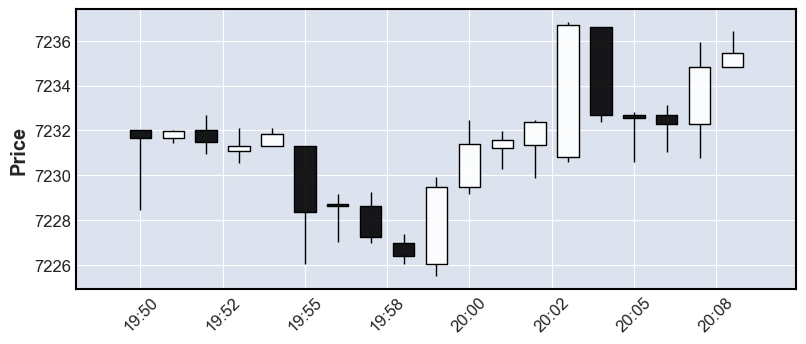

In [43]:
mpf.plot(df_temp, type='candle', figsize=(10,4))

## Do the linear regression of 'left' and 'right' sides

### Left

In [44]:
x_left = df_temp[df_temp.index < event_date].open_time.values.reshape((-1,1))
y_left = df_temp[df_temp.index < event_date].close.values

In [45]:
model_left = LinearRegression()

In [46]:
model_left.fit(x_left, y_left)

LinearRegression()

In [47]:
r_sq = model_left.score(x_left, y_left)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_left.intercept_}")
print(f"slope: {model_left.coef_}")

coefficient of determination: 0.8268614017498485
intercept: 19262095.933667596
slope: [-1.22027778e-05]


In [48]:
model_left.coef_[0]

-1.2202777777778366e-05

In [49]:
 y_left_pred = model_left.predict(x_left)
 print(f"predicted response:\n{y_left_pred}")

predicted response:
[7232.81533333 7232.08316667 7231.351      7230.61883333 7229.88666667
 7229.1545     7228.42233333 7227.69016667 7226.958     ]


### Right

In [50]:
x_right = df_temp[df_temp.index > event_date].open_time.values.reshape((-1,1))
y_right = df_temp[df_temp.index > event_date].close.values

In [51]:
model_right = LinearRegression()

In [52]:
model_right.fit(x_right, y_right)

LinearRegression()

In [53]:
r_sq = model_right.score(x_right, y_right)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_right.intercept_}")
print(f"slope: {model_right.coef_}")

coefficient of determination: 0.27536638534128477
intercept: -9372559.312222859
slope: [5.94444444e-06]


In [54]:
 y_right_pred = model_right.predict(x_right)
 print(f"predicted response:\n{y_right_pred}")

predicted response:
[7231.88777778 7232.24444444 7232.60111111 7232.95777778 7233.31444445
 7233.67111111 7234.02777778 7234.38444445 7234.74111111]


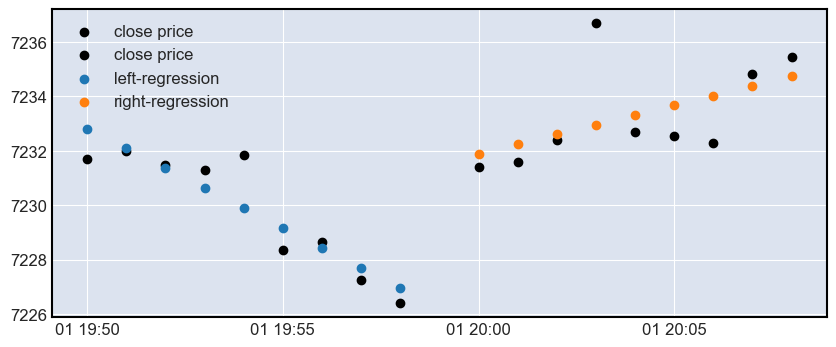

In [55]:
plt.figure(figsize=(10,4))

x_left_new = df_temp[df_temp.index < event_date].index.values.reshape((-1,1))
x_right_new = df_temp[df_temp.index > event_date].index.values.reshape((-1,1))

# plot lines
plt.scatter(x_left_new, y_left, label = "close price", color="black")
plt.scatter(x_right_new, y_right, label = "close price", color="black")
plt.scatter(x_left_new, y_left_pred, label = "left-regression")
plt.scatter(x_right_new, y_right_pred, label = "right-regression")
plt.legend()

plt.show()

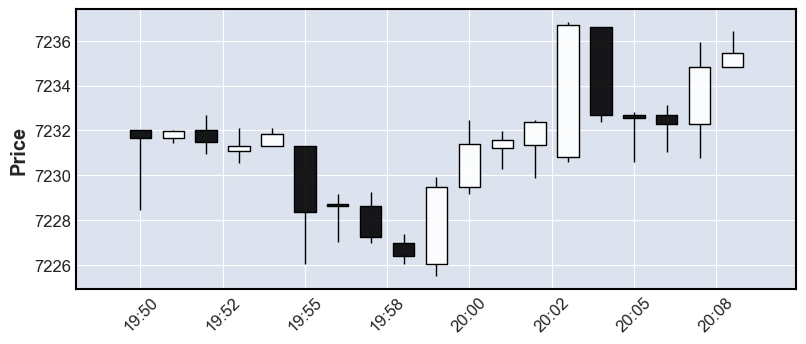

In [56]:
mpf.plot(df_temp, type='candle', figsize=(10,4))

In [66]:
from src import tests_utils as u

In [67]:
#l,r = ccp.check_reversal(df, event_date, time_window_in_min)

In [68]:
list_dates_invertedhammer = df[df['CDLINVERTEDHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_hammer = df[df['CDLHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_piercing = df[df['CDLPIERCING'] == 100]['formatted_open_time'].to_list()
list_dates_morningstar = df[df['CDLMORNINGSTAR'] == 100]['formatted_open_time'].to_list()

In [58]:
print(len(list_dates_invertedhammer))
print(len(list_dates_hammer))
print(len(list_dates_piercing))
print(len(list_dates_morningstar))

7061
34556
282
3546


In [62]:
list_validate_dates_invertedhammer = []
for date in list_dates_invertedhammer:
    l,r = ccp.check_reversal(df, date, time_window_in_min)
    if ((l==-1) & (r==1)):
        list_validate_dates_invertedhammer.append(date)

list_validate_dates_hammer = []
for date in list_dates_hammer:
    l,r = ccp.check_reversal(df, date, time_window_in_min)
    if ((l==-1) & (r==1)):
        list_validate_dates_hammer.append(date)

list_validate_dates_piercing = []
for date in list_dates_piercing:
    l,r = ccp.check_reversal(df, date, time_window_in_min)
    if ((l==-1) & (r==1)):
        list_validate_dates_piercing.append(date)

list_validate_dates_morningstar = []
for date in list_dates_morningstar:
    l,r = ccp.check_reversal(df, date, time_window_in_min)
    if ((l==-1) & (r==1)):
        list_validate_dates_morningstar.append(date)        

In [63]:
print(len(list_validate_dates_invertedhammer))
print(len(list_validate_dates_hammer))
print(len(list_validate_dates_piercing))
print(len(list_validate_dates_morningstar))

1989
9109
101
1267


In [59]:
list_dates_shootingstar = df[df['CDLSHOOTINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_hangingman = df[df['CDLHANGINGMAN'] == -100]['formatted_open_time'].to_list()
list_dates_darkcloudcover = df[df['CDLDARKCLOUDCOVER'] == -100]['formatted_open_time'].to_list()
list_dates_eveningstar = df[df['CDLEVENINGSTAR'] == -100]['formatted_open_time'].to_list()

In [60]:
print(len(list_dates_shootingstar))
print(len(list_dates_hangingman))
print(len(list_dates_darkcloudcover))
print(len(list_dates_eveningstar))

8400
22099
427
3469


In [64]:
list_validate_dates_shootingstar = []
for date in list_dates_shootingstar:
    l,r = ccp.check_reversal(df, date, time_window_in_min)
    if ((l==1) & (r==-1)):
        list_validate_dates_shootingstar.append(date)

list_validate_dates_hangingman = []
for date in list_dates_hangingman:
    l,r = ccp.check_reversal(df, date, time_window_in_min)
    if ((l==1) & (r==-1)):
        list_validate_dates_hangingman.append(date)

list_validate_dates_darkcloudcover = []
for date in list_dates_darkcloudcover:
    l,r = ccp.check_reversal(df, date, time_window_in_min)
    if ((l==-1) & (r==1)):
        list_validate_dates_darkcloudcover.append(date)

list_validate_dates_eveningstar = []
for date in list_dates_eveningstar:
    l,r = ccp.check_reversal(df, date, time_window_in_min)
    if ((l==-1) & (r==1)):
        list_validate_dates_eveningstar.append(date)        

In [65]:
print(len(list_validate_dates_shootingstar))
print(len(list_validate_dates_hangingman))
print(len(list_validate_dates_darkcloudcover))
print(len(list_validate_dates_eveningstar))

2331
6454
97
587
